In [79]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import hdbscan
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from collections import Counter



**Data Loading**

In [49]:
df_pca = pd.read_csv('df_pca.csv', index_col=0)
print("df_pca shape:", df_pca.shape)

df_full = pd.read_csv('player_features_cleaned.csv')
print("player_features_cleaned shape:", df_full.shape)

df_clean = pd.read_csv('df_clean.csv')
print("df_clean shape:", df_clean.shape)

df_pca shape: (1181, 12)
player_features_cleaned shape: (2065, 56)
df_clean shape: (1181, 56)


In [50]:
print("df_pca head:")
print(df_pca.head())

df_pca head:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  5.918667 -3.647902  1.782542  1.422488 -2.157467 -1.198568  1.038364   
1  5.025164  5.225452 -1.289987 -0.208177  0.996782  1.659991  0.106682   
2  1.904123  4.437600 -0.968827 -2.033994  1.871134  1.771842  0.110613   
3 -2.140260 -3.037802 -1.121331  0.834883 -0.114817  0.010791 -0.351239   
4 -2.608275  0.458398 -0.864211 -0.084787 -2.703026  0.859593 -0.422904   

        PC8       PC9      PC10  player_number_ind       player_ind  
0  0.045202  0.931962  1.013977                 35     Kayla Grimme  
1  0.206678  0.468763 -0.015596                 15      Amani Tatum  
2  0.701627  1.383568  0.060497                  2      Gabby Cajou  
3  0.933642 -0.770142 -0.001717                 30     Mikki Guiton  
4  0.224549 -0.963942 -0.434829                 14  Taylor Williams  


In [51]:
# pull the PC columns into a NumPy array
pc_cols   = [c for c in df_pca.columns if c.startswith('PC')]
X_cluster = df_pca[pc_cols].values


**K-Means Cluster**

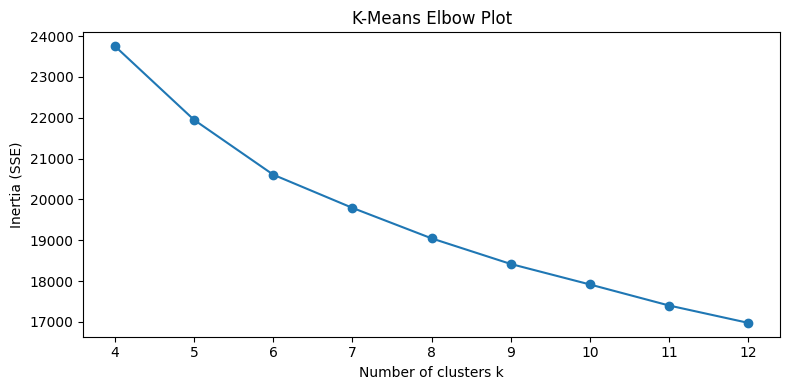

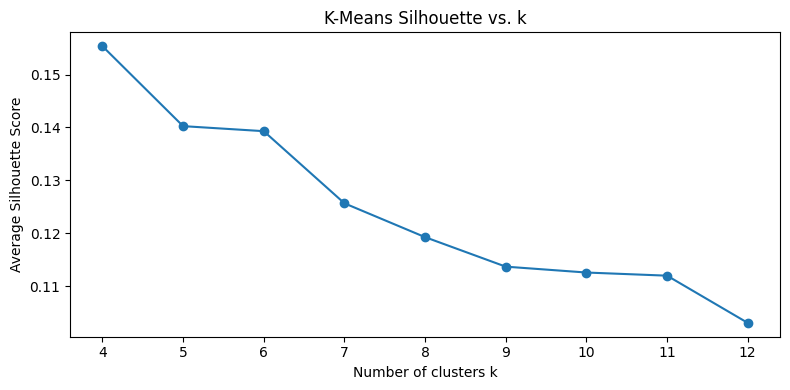

In [52]:
# K-Means Elbow & Silhouette Sweep

ks = list(range(4, 13))
inertias = []
sil_scores = []

for k in ks:
    # fit KMeans
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_cluster)
    
    # record inertia (sum of squared distances to centroids)
    inertias.append(km.inertia_)
    
    # record silhouette (only valid if k>1)
    sil = silhouette_score(X_cluster, labels) if k > 1 else np.nan
    sil_scores.append(sil)

# Plot inertia (elbow)
plt.figure(figsize=(8,4))
plt.plot(ks, inertias, marker='o', linestyle='-')
plt.xlabel("Number of clusters k")
plt.ylabel("Inertia (SSE)")
plt.title("K-Means Elbow Plot")
plt.tight_layout()
plt.show()

# Plot silhouette
plt.figure(figsize=(8,4))
plt.plot(ks, sil_scores, marker='o', linestyle='-')
plt.xlabel("Number of clusters k")
plt.ylabel("Average Silhouette Score")
plt.title("K-Means Silhouette vs. k")
plt.tight_layout()
plt.show()


In [53]:
print("df_pca head:")
print(df_pca.head())

df_pca head:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  5.918667 -3.647902  1.782542  1.422488 -2.157467 -1.198568  1.038364   
1  5.025164  5.225452 -1.289987 -0.208177  0.996782  1.659991  0.106682   
2  1.904123  4.437600 -0.968827 -2.033994  1.871134  1.771842  0.110613   
3 -2.140260 -3.037802 -1.121331  0.834883 -0.114817  0.010791 -0.351239   
4 -2.608275  0.458398 -0.864211 -0.084787 -2.703026  0.859593 -0.422904   

        PC8       PC9      PC10  player_number_ind       player_ind  
0  0.045202  0.931962  1.013977                 35     Kayla Grimme  
1  0.206678  0.468763 -0.015596                 15      Amani Tatum  
2  0.701627  1.383568  0.060497                  2      Gabby Cajou  
3  0.933642 -0.770142 -0.001717                 30     Mikki Guiton  
4  0.224549 -0.963942 -0.434829                 14  Taylor Williams  



k=4  missing labels? 0
k=4, silhouette = 0.155
Centroids:
         pts_per40  eFG_pct  AST_per_TO  reb_per40  stl_per40  blk_per40
cluster                                                                 
0            -0.35    -0.33       -0.33      -0.24      -0.35      -0.13
1            -1.25    -0.76        1.05      -0.72       0.30      -0.58
2             0.43     0.54       -0.53       1.14      -0.16       1.01
3             0.74     0.40        0.35      -0.20       0.46      -0.30


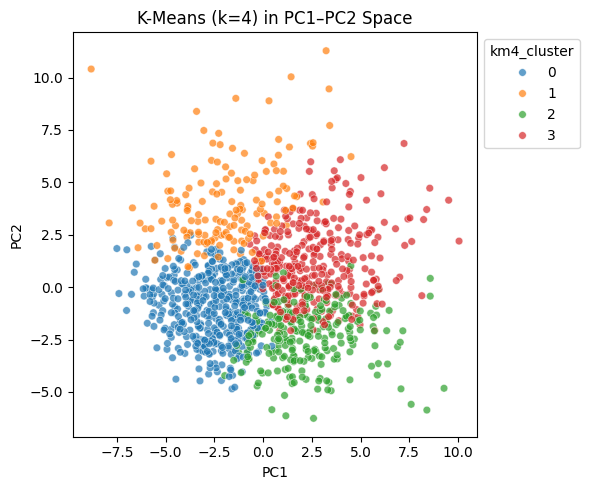


k=5  missing labels? 0
k=5, silhouette = 0.140
Centroids:
         pts_per40  eFG_pct  AST_per_TO  reb_per40  stl_per40  blk_per40
cluster                                                                 
0            -1.12    -0.59        1.28      -0.72       0.49      -0.59
1             0.12     0.37       -0.71       0.95      -0.28       0.81
2             0.45     0.49        0.23      -0.66      -0.06      -0.47
3             0.93     0.38        0.11       0.73       0.56       0.41
4            -0.77    -0.82       -0.30      -0.34      -0.35      -0.23


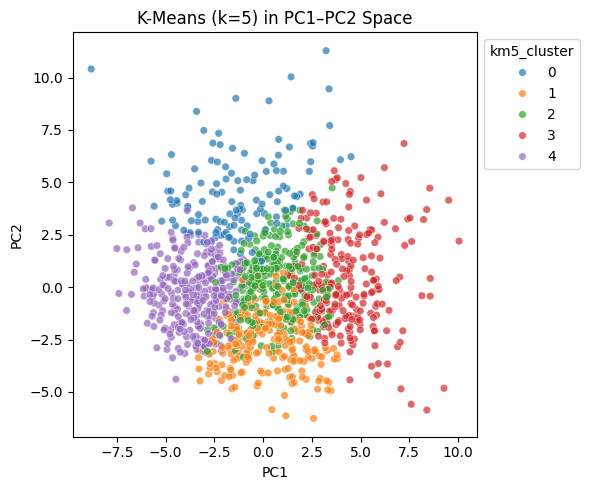


k=6  missing labels? 0
k=6, silhouette = 0.139
Centroids:
         pts_per40  eFG_pct  AST_per_TO  reb_per40  stl_per40  blk_per40
cluster                                                                 
0            -0.67    -0.72       -0.32      -0.35      -0.47      -0.17
1             0.91     0.47       -0.19       1.08       0.01       0.85
2            -1.33    -0.81        0.79      -0.74       0.14      -0.58
3             0.00     0.33       -0.64       0.84      -0.19       0.69
4             0.44     0.42        0.18      -0.64      -0.05      -0.47
5             0.53     0.13        0.82      -0.11       1.30      -0.44


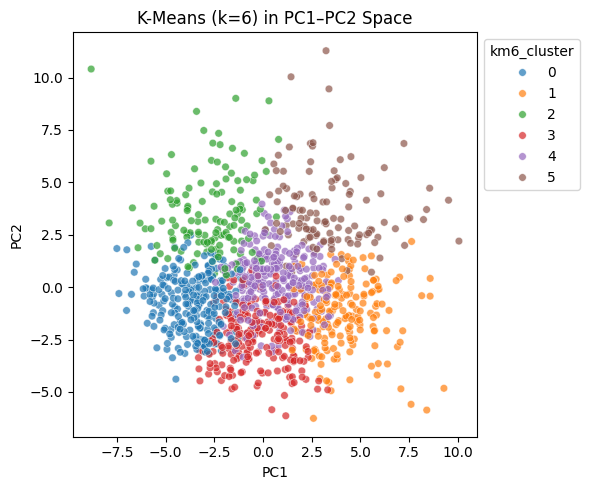

In [54]:
# K-Means Clustering

# reset both indexes to simple RangeIndex so positions match
df_clean = df_clean.reset_index(drop=True)
df_pca   = df_pca.reset_index(drop=True)

# make sure we have our PC matrix
X_cluster = df_pca[pc_cols].values

# stats we'll profile
key_stats = ['pts_per40','eFG_pct','AST_per_TO','reb_per40','stl_per40','blk_per40']

for k in (4, 5, 6):
    col = f'km{k}_cluster'
    
    # fit & predict
    km     = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_cluster)
    
    # positional assignment (no alignment)
    df_pca[col]   = labels
    df_clean[col] = labels  # safe: both have same length & index
    
    # check no NaNs snuck in
    n_missing = df_clean[col].isna().sum()
    print(f"\n{k=}  missing labels? {n_missing}")
    
    # silhouette
    sil = silhouette_score(X_cluster, labels)
    print(f"k={k}, silhouette = {sil:.3f}")
    
    # centroids on your key stats
    cent = (
        df_clean
        .groupby(col)[key_stats]
        .mean()
        .round(2)
        .rename_axis('cluster')
    )
    print("Centroids:")
    print(cent.to_string())
    
    # scatter in PC1–PC2
    plt.figure(figsize=(6,5))
    sns.scatterplot(
        x=df_pca['PC1'].values,
        y=df_pca['PC2'].values,
        hue=labels,
        palette='tab10',
        s=30,
        alpha=0.7
    )
    plt.title(f"K-Means (k={k}) in PC1–PC2 Space")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend(title=col, bbox_to_anchor=(1,1))
    plt.tight_layout()
    plt.show()



In [ ]:
# Compute cluster centroids on available metrics

# Define the metrics you’ll use to represent each archetype
archetype_metrics = {
    'Primary Ball Handler':       ['USG_pct', 'AST_per_TO'],
    'Shot Creator':               ['USG_pct', 'PPP'],
    'Slasher':                    ['FTr', 'pts_per40'],
    'Movement/Off-Screen Shooter':['eFG_pct', 'PPP'],
    '3-and-D Wing':               ['eFG_pct', 'stl_per40', 'blk_per40'],
    'Stretch Big / Versatile Big':['reb_per40', 'AST_per_TO', 'pts_per40'],
    'Defensive Anchor / Rim Protector':['blk_per40','reb_per40']
}



In [ ]:
# Gather all metrics you defined
all_metrics = sorted({m for mets in archetype_metrics.values() for m in mets})

# Check presence and dtype
for m in all_metrics:
    if m in df_clean.columns:
        print(f"{m:25s} present, dtype = {df_clean[m].dtype}")
    else:
        print(f"{m:25s} MISSING")


AST_per_TO                present, dtype = float64
FTr                       present, dtype = float64
PPP                       present, dtype = float64
USG_pct                   present, dtype = float64
blk_per40                 present, dtype = float64
eFG_pct                   present, dtype = float64
pts_per40                 present, dtype = float64
reb_per40                 present, dtype = float64
stl_per40                 present, dtype = float64


In [72]:
# Compute the centroids for k=5 on those metrics
# flatten and dedupe all archetype metrics
all_metrics = sorted({m for mets in archetype_metrics.values() for m in mets})

# keep only metrics that actually exist in df_clean
present = [m for m in all_metrics if m in df_clean.columns]

# compute centroids grouping only on those numeric columns
cm = (
    df_clean
      .groupby('km6_cluster')[present]   # ← slice to numeric only
      .mean()
      .round(2)
)

print("Cluster centroids (k=5) on archetype metrics:")
print(cm.to_string())



Cluster centroids (k=5) on archetype metrics:
             AST_per_TO   FTr   PPP  USG_pct  blk_per40  eFG_pct  pts_per40  reb_per40  stl_per40
km6_cluster                                                                                      
0                 -0.32 -0.57 -0.96    -0.48      -0.17    -0.72      -0.67      -0.35      -0.47
1                 -0.19  0.25  0.57     0.85       0.85     0.47       0.91       1.08       0.01
2                  0.79  0.36 -0.57    -0.81      -0.58    -0.81      -1.33      -0.74       0.14
3                 -0.64  0.54  0.49    -0.23       0.69     0.33       0.00       0.84      -0.19
4                  0.18 -0.42  0.20     0.19      -0.47     0.42       0.44      -0.64      -0.05
5                  0.82  0.38  0.41     0.64      -0.44     0.13       0.53      -0.11       1.30


In [73]:
# Match clusters to archetypes by z-score

# Z-score the centroids so each metric is comparable

cm_z = cm.apply(zscore)

# Score each cluster against each archetype
scores = pd.DataFrame(index=cm_z.index, columns=archetype_metrics.keys(), dtype=float)

for arch, mets in archetype_metrics.items():
    # for each cluster, average its z-scores on the archetype’s defining metrics
    scores[arch] = cm_z[mets].mean(axis=1)

print("Cluster → Archetype similarity scores:")
display(scores.round(2))

# For each archetype, find the cluster with highest score
mapping = { arch: int(scores[arch].idxmax()) for arch in scores }
print("Suggested cluster → archetype assignment:")
for arch, cl in mapping.items():
    print(f"  Cluster {cl} → {arch}")


Cluster → Archetype similarity scores:


,Primary Ball Handler,Shot Creator,Slasher,Movement/Off-Screen Shooter,3-and-D Wing,Stretch Big / Versatile Big,Defensive Anchor / Rim Protector
km6_cluster,,,,,,,
0,-0.82,-1.28,-1.20,-1.50,-0.87,-0.71,-0.39
1,0.43,1.17,0.80,0.94,0.75,0.73,1.52
2,-0.08,-1.22,-0.54,-1.25,-0.80,-0.51,-1.02
3,-0.90,0.19,0.54,0.74,0.45,-0.05,1.21
4,0.20,0.29,-0.30,0.58,-0.08,-0.07,-0.86
5,1.17,0.85,0.70,0.48,0.56,0.61,-0.45


Suggested cluster → archetype assignment:
  Cluster 5 → Primary Ball Handler
  Cluster 1 → Shot Creator
  Cluster 1 → Slasher
  Cluster 1 → Movement/Off-Screen Shooter
  Cluster 1 → 3-and-D Wing
  Cluster 1 → Stretch Big / Versatile Big
  Cluster 1 → Defensive Anchor / Rim Protector


In [74]:
# Map each cluster to its best‐matching archetype

# Z‐score the scores so they’re comparable (optional if you already did)
from scipy.stats import zscore
scores_z = scores.apply(zscore, axis=0).round(2)

# For each cluster, pick the archetype with the max score
cluster_to_arch = {
    cluster: scores_z.columns[scores_z.loc[cluster].argmax()]
    for cluster in scores_z.index
}

print("Cluster → Archetype mapping:")
for cl, arch in cluster_to_arch.items():
    print(f"  Cluster {cl}  →  {arch}")

print("\nFull cluster×archetype scores (z‐scored):")
display(scores_z)



Cluster → Archetype mapping:
  Cluster 0  →  Defensive Anchor / Rim Protector
  Cluster 1  →  Defensive Anchor / Rim Protector
  Cluster 2  →  Primary Ball Handler
  Cluster 3  →  Defensive Anchor / Rim Protector
  Cluster 4  →  Movement/Off-Screen Shooter
  Cluster 5  →  Primary Ball Handler

Full cluster×archetype scores (z‐scored):


,Primary Ball Handler,Shot Creator,Slasher,Movement/Off-Screen Shooter,3-and-D Wing,Stretch Big / Versatile Big,Defensive Anchor / Rim Protector
km6_cluster,,,,,,,
0,-1.14,-1.36,-1.63,-1.52,-1.35,-1.35,-0.39
1,0.59,1.24,1.08,0.96,1.16,1.38,1.53
2,-0.12,-1.29,-0.73,-1.27,-1.25,-0.97,-1.03
3,-1.25,0.20,0.74,0.75,0.70,-0.10,1.22
4,0.29,0.31,-0.41,0.59,-0.13,-0.12,-0.86
5,1.63,0.90,0.95,0.49,0.86,1.16,-0.46


cluster 4 has only negative scores => this shows porr fit with the archetypes. need further investigation.

In [76]:
# Flatten archetype metrics and select those columns
all_mets = sorted({m for mets in archetype_metrics.values() for m in mets})
present = [m for m in all_mets if m in df_clean.columns]

# Compute centroids for k=5 on those metrics
centroids = df_clean.groupby('km6_cluster')[present].mean()

# Show cluster 4’s centroid
print("Cluster 4 raw centroids:")
print(centroids.loc[4].round(2).to_string())


Cluster 4 raw centroids:
AST_per_TO    0.18
FTr          -0.42
PPP           0.20
USG_pct       0.19
blk_per40    -0.47
eFG_pct       0.42
pts_per40     0.44
reb_per40    -0.64
stl_per40    -0.05


every value is negative => confirming my theory

**Find the most important basketball metrics for each cluster**

In [77]:

# Z-score *across clusters* for each metric (axis=0)
centroids_z = centroids.apply(zscore, axis=0)

for cl in centroids_z.index:
    print(f"\nCluster {cl} — top 5 distinctive metrics:")
    # absolute z-scores, descending
    top = centroids_z.loc[cl].abs().sort_values(ascending=False).head(5)
    display(top.to_frame(name='|z|'))



Cluster 0 — top 5 distinctive metrics:


,|z|
PPP,1.698555
FTr,1.554500
eFG_pct,1.297276
stl_per40,1.062972
USG_pct,0.858128



Cluster 1 — top 5 distinctive metrics:


,|z|
reb_per40,1.514456
blk_per40,1.513083
USG_pct,1.391035
pts_per40,1.212227
PPP,0.946147



Cluster 2 — top 5 distinctive metrics:


,|z|
pts_per40,1.710337
eFG_pct,1.470546
USG_pct,1.414496
AST_per_TO,1.239128
reb_per40,1.066298



Cluster 3 — top 5 distinctive metrics:


,|z|
AST_per_TO,1.359227
blk_per40,1.237697
reb_per40,1.181508
FTr,1.063544
PPP,0.805460



Cluster 4 — top 5 distinctive metrics:


,|z|
FTr,1.201268
reb_per40,0.933137
eFG_pct,0.848222
blk_per40,0.790451
pts_per40,0.599584



Cluster 5 — top 5 distinctive metrics:


,|z|
stl_per40,2.102106
AST_per_TO,1.303155
USG_pct,1.036813
blk_per40,0.726972
pts_per40,0.721537


**GMM + BIC**


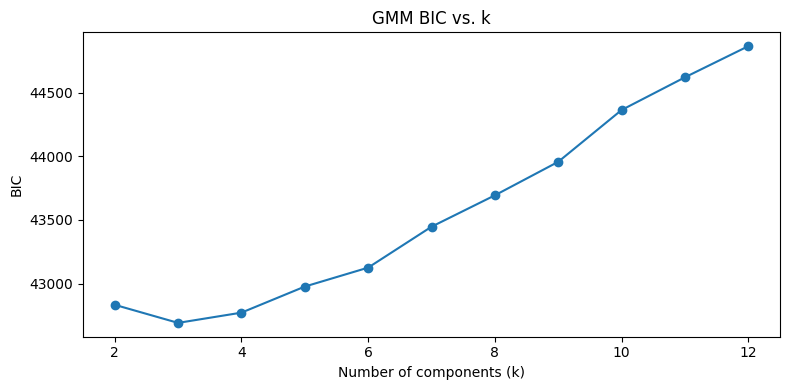

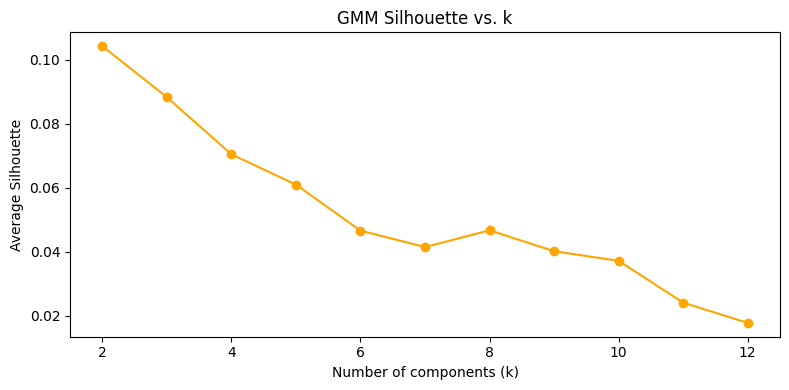

Best k by BIC: 3
GMM (k=3) silhouette = 0.088
Cluster sizes: {0: 482, 1: 329, 2: 370}


In [83]:
# GMM + BIC sweep to choose n_components

bic_scores  = []
sil_scores  = []
ks          = range(2, 13)

for k in ks:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_cluster)
    bic_scores.append(gmm.bic(X_cluster))
    
    labels = gmm.predict(X_cluster)
    # compute silhouette only if more than one component
    sil = silhouette_score(X_cluster, labels) if k > 1 else np.nan
    sil_scores.append(sil)

# plot BIC curve
plt.figure(figsize=(8,4))
plt.plot(list(ks), bic_scores, marker='o')
plt.xlabel("Number of components (k)")
plt.ylabel("BIC")
plt.title("GMM BIC vs. k")
plt.tight_layout()
plt.show()

# plot silhouette for reference
plt.figure(figsize=(8,4))
plt.plot(list(ks), sil_scores, marker='o', color='orange')
plt.xlabel("Number of components (k)")
plt.ylabel("Average Silhouette")
plt.title("GMM Silhouette vs. k")
plt.tight_layout()
plt.show()

# choose the k with the lowest BIC
best_k = ks[int(np.argmin(bic_scores))]
print(f"Best k by BIC: {best_k}")

# fit final GMM
gmm_final = GaussianMixture(n_components=best_k, random_state=42)
df_pca['gmm_cluster'] = gmm_final.fit_predict(X_cluster)
df_clean['gmm_cluster'] = df_pca['gmm_cluster']

# evaluate final
labels = df_pca['gmm_cluster']
sil = silhouette_score(X_cluster, labels)
sizes = pd.Series(labels).value_counts().sort_index().to_dict()

print(f"GMM (k={best_k}) silhouette = {sil:.3f}")
print("Cluster sizes:", sizes)


Statistically, GMM thinks 3 components is your optimum: beyond that, they are over‐fitting (BIC rises) and clusters become less well‐separated (silhouette drops).
Practically, if the goal really demands 6+ distinct groups, then GMM may not be the right tool—its ellipsoidal‐Gaussian assumption simply doesn’t carve out six tight, meaningful blobs in this feature space.

**HDBSCAN**

/Users/savvasneofytou/Desktop/data-driven-framework-for-athlete-profiling-1/venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/savvasneofytou/Desktop/data-driven-framework-for-athlete-profiling-1/venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/savvasneofytou/Desktop/data-driven-framework-for-athlete-profiling-1/venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/savvasneofytou/Desktop/data-driven-framework-for-athlete-profiling-1/venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

HDBSCAN tuning results (including cluster sizes):


/Users/savvasneofytou/Desktop/data-driven-framework-for-athlete-profiling-1/venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/savvasneofytou/Desktop/data-driven-framework-for-athlete-profiling-1/venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/savvasneofytou/Desktop/data-driven-framework-for-athlete-profiling-1/venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/savvasneofytou/Desktop/data-driven-framework-for-athlete-profiling-1/venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

n_clusters  noise_pct  silhouette  \
min_size min_samples                                      
5        1                     4   0.207451    0.062139   
         3                     4   0.670618    0.134999   
         5                     3   0.761219    0.145413   
10       1                     2   0.360711    0.198159   
         3                     2   0.682472    0.165207   
         5                     3   0.942422    0.271384   
20       1                     2   0.482642    0.133419   
         3                     2   0.887384    0.275482   
         5                     0   1.000000         NaN   

                                                     sizes  
min_size min_samples                                        
5        1             {-1: 245, 0: 5, 1: 5, 2: 8, 3: 918}  
         3            {-1: 792, 0: 7, 1: 7, 2: 13, 3: 362}  
         5                   {-1: 899, 0: 5, 1: 6, 2: 271}  
10       1                        {-1: 426, 0: 11, 1: 744}  
         3                        {-1: 806, 0: 13, 1: 362}  
         5                 {-1: 1113, 0: 17, 1: 37, 2: 14}  
20       1                        {-1: 570, 0: 20, 1: 591}  
         3                       {-1: 1048, 0: 22, 1: 111}  
         5                                      {-1: 1181}

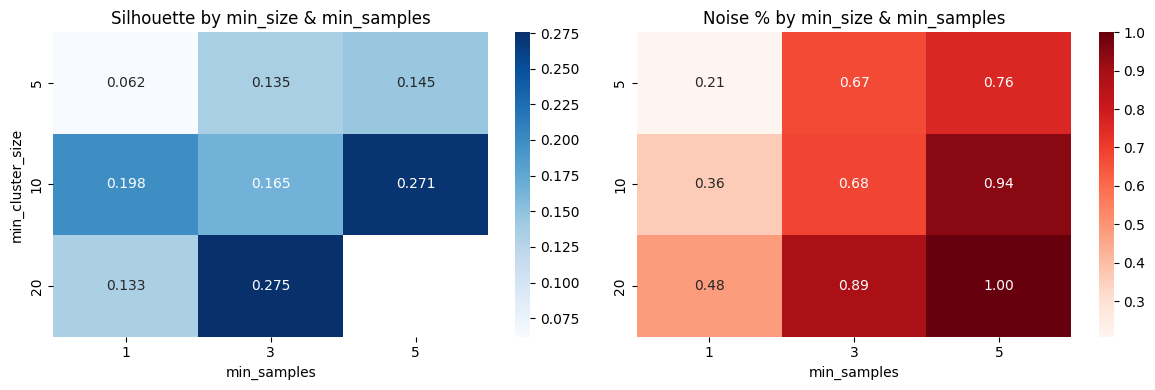

In [90]:
# HDBSCAN Tuning Sweep with Cluster Sizes 
import hdbscan
from sklearn.metrics import silhouette_score

results = []
for min_size in [5, 10, 20]:
    for min_samp in [1, 3, 5]:
        hdb = hdbscan.HDBSCAN(
            min_cluster_size=min_size,
            min_samples=min_samp,
            metric='euclidean'
        )
        labels = hdb.fit_predict(X_cluster)
        
        # create a Series for easy counting
        lab_ser = pd.Series(labels)
        
        # count real clusters (excluding noise = -1)
        sizes_dict = lab_ser.value_counts().sort_index().to_dict()
        n_clusters = len(sizes_dict) - (1 if -1 in sizes_dict else 0)
        noise_pct  = lab_ser.eq(-1).mean()
        
        # silhouette on non-noise only
        if n_clusters > 1:
            mask = labels != -1
            sil = silhouette_score(X_cluster[mask], labels[mask])
        else:
            sil = np.nan
        
        results.append({
            'min_size':    min_size,
            'min_samples': min_samp,
            'n_clusters':  n_clusters,
            'noise_pct':   noise_pct,
            'silhouette':  sil,
            'sizes':       sizes_dict
        })

tune_df = pd.DataFrame(results).set_index(['min_size','min_samples'])
print("HDBSCAN tuning results (including cluster sizes):")
display(tune_df)

# Plot silhouette and noise% heatmaps
fig, axes = plt.subplots(1, 2, figsize=(12,4))

# silhouette heatmap
sil_heat = tune_df['silhouette'].unstack(level='min_samples')
sns.heatmap(sil_heat, annot=True, fmt=".3f", ax=axes[0], cmap="Blues")
axes[0].set_title("Silhouette by min_size & min_samples")
axes[0].set_xlabel("min_samples")
axes[0].set_ylabel("min_cluster_size")

# noise% heatmap
noise_heat = tune_df['noise_pct'].unstack(level='min_samples')
sns.heatmap(noise_heat, annot=True, fmt=".2f", ax=axes[1], cmap="Reds")
axes[1].set_title("Noise % by min_size & min_samples")
axes[1].set_xlabel("min_samples")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()


Tiny clusters + huge noise
Even when you get the right count (e.g. 4 clusters at 5 /1), one cluster grabs almost all non-noise points (~918), and the other clusters have only 5–8 members. That isn’t useful.

Too few clusters
Settings that drop noise to under 40 % generally yield only 2 clusters—far below the target of 5–6.

Silhouette too low
Even the best silhouette (0.198 at 10 /1) is on only 2 clusters. Once you demand more clusters, silhouette plunges (<0.15).

None of these parameter combinations give us well-populated clusters with low noise and reasonable silhouette. HDBSCAN, in this full PC space and with these density settings, simply can’t carve out your desired archetypes.

**Agglomerative Clustering**

AgglomerativeClustering performance by k:


,silhouette,sizes
k,,
2,0.143,"{0: 503, 1: 678}"
3,0.148,"{0: 678, 1: 171, 2: 332}"
4,0.100,"{0: 171, 1: 444, 2: 332, 3: 234}"
5,0.104,"{0: 332, 1: 444, 2: 128, 3: 234, 4: 43}"
6,0.093,"{0: 444, 1: 234, 2: 128, 3: 216, 4: 43, 5: 116}"
7,0.082,"{0: 234, 1: 216, 2: 128, 3: 215, 4: 43, 5: 116..."
8,0.079,"{0: 216, 1: 215, 2: 128, 3: 93, 4: 43, 5: 116,..."
9,0.072,"{0: 215, 1: 101, 2: 128, 3: 115, 4: 43, 5: 116..."
10,0.067,"{0: 128, 1: 101, 2: 229, 3: 115, 4: 108, 5: 11..."


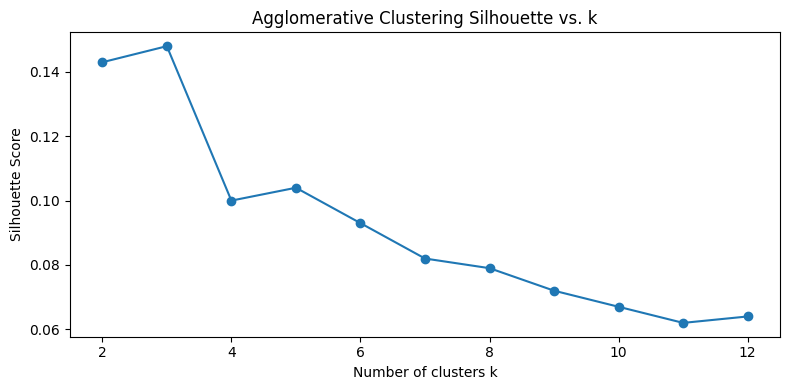

In [91]:
# Agglomerative Clustering Sweep over k

results = []
ks = range(2, 13)  # trying k = 2…12

for k in ks:
    # fit agglomerative with Ward linkage
    agg = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = agg.fit_predict(X_cluster)
    
    # assign labels for later profiling if desired
    df_pca[f'agg_{k}']   = labels
    df_clean[f'agg_{k}'] = labels
    
    # compute silhouette
    sil = silhouette_score(X_cluster, labels)
    
    # compute cluster size distribution
    sizes = pd.Series(labels).value_counts().sort_index().to_dict()
    
    results.append({
        'k': k,
        'silhouette': sil,
        'sizes': sizes
    })

# build summary DataFrame
agg_df = pd.DataFrame(results).set_index('k')
agg_df['silhouette'] = agg_df['silhouette'].round(3)

# display silhouette scores and sizes
print("AgglomerativeClustering performance by k:")
display(agg_df)

# Plot silhouette vs k
plt.figure(figsize=(8,4))
plt.plot(agg_df.index, agg_df['silhouette'], marker='o')
plt.xlabel("Number of clusters k")
plt.ylabel("Silhouette Score")
plt.title("Agglomerative Clustering Silhouette vs. k")
plt.tight_layout()
plt.show()



=== k = 4  |  silhouette = 0.1  |  sizes = {0: 171, 1: 444, 2: 332, 3: 234} ===
Centroids:
         pts_per40  eFG_pct  AST_per_TO  reb_per40  stl_per40  blk_per40
cluster                                                                 
0            -0.10     0.01        1.24      -0.42       0.85      -0.55
1            -0.69    -0.65       -0.28      -0.25      -0.27      -0.14
2             0.63     0.48       -0.35       0.92      -0.16       0.77
3             0.49     0.53        0.12      -0.51       0.13      -0.43


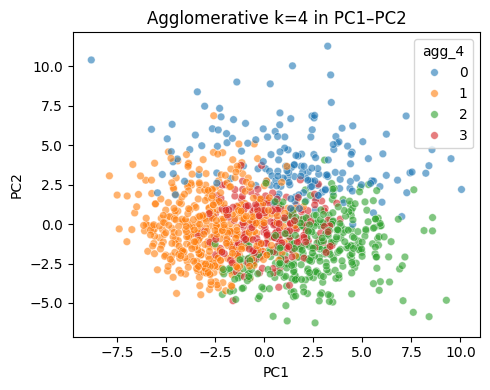


=== k = 5  |  silhouette = 0.104  |  sizes = {0: 332, 1: 444, 2: 128, 3: 234, 4: 43} ===
Centroids:
         pts_per40  eFG_pct  AST_per_TO  reb_per40  stl_per40  blk_per40
cluster                                                                 
0             0.63     0.48       -0.35       0.92      -0.16       0.77
1            -0.69    -0.65       -0.28      -0.25      -0.27      -0.14
2             0.44     0.15        0.95      -0.28       1.09      -0.51
3             0.49     0.53        0.12      -0.51       0.13      -0.43
4            -1.72    -0.41        2.12      -0.83       0.14      -0.69


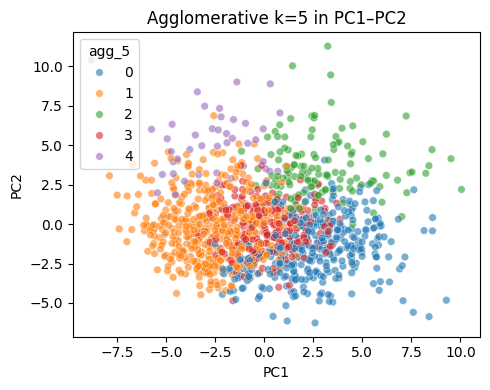

In [92]:
for k in (4, 5):
    labels = df_clean[f'agg_{k}']
    print(f"\n=== k = {k}  |  silhouette = {agg_df.loc[k,'silhouette']}  |  sizes = {agg_df.loc[k,'sizes']} ===")
    
    # centroids of key stats
    cent = (
        df_clean
          .groupby(labels)[key_stats]
          .mean()
          .round(2)
          .rename_axis('cluster')
    )
    print("Centroids:")
    print(cent.to_string())
    
    # PC1–PC2 scatter
    plt.figure(figsize=(5,4))
    sns.scatterplot(
        x='PC1', y='PC2',
        hue=labels,
        data=df_pca,
        palette='tab10',
        s=30, alpha=0.6
    )
    plt.title(f"Agglomerative k={k} in PC1–PC2")
    plt.tight_layout()
    plt.show()


Agglomerative Clustering only gives four clean groups. Pushing to five or six just collapses tiny outliers into their own cluster or drives silhouette so low it isn’t credible. Four styles may be too coarse for this research.